<a href="https://colab.research.google.com/github/rutavmehta/Skill/blob/main/Skill.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Experiment 1: Dataset Loading**

Dataset loading is the process of importing data from a file (like CSV) into a structure (e.g., DataFrame in pandas) for analysis.

Printing information involves displaying details about the dataset, such as its first few rows, data types, shape, and summary statistics to understand its structure and content.

In [13]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"/content/drive/MyDrive/archive.csv")

# Display first few rows
print("\n===== FIRST FEW ROWS =====")
print(df.head(200))

# Show dataset info and basic stats
print("\n===== DATAFRAME INFO =====")
print(df.info())

print("\n===== DATA SUMMARY =====")
print(df.describe())


===== FIRST FEW ROWS =====
    Student_ID  Age  Gender  High_School_GPA  SAT_Score  University_Ranking  \
0       S00001   24    Male             3.58       1052                 291   
1       S00002   21   Other             2.52       1211                 112   
2       S00003   28  Female             3.42       1193                 715   
3       S00004   25    Male             2.43       1497                 170   
4       S00005   22    Male             2.08       1012                 599   
..         ...  ...     ...              ...        ...                 ...   
195     S00196   26    Male             3.96       1097                 470   
196     S00197   22  Female             3.99        931                 470   
197     S00198   18  Female             3.11       1547                 785   
198     S00199   20    Male             2.34       1240                 493   
199     S00200   27  Female             2.63       1557                 738   

     University_GPA    

**Experiment 2: Dataset Cleaning**

Dataset cleaning is the process of fixing or removing incorrect, incomplete, duplicate, or irrelevant data to ensure the dataset is accurate, consistent, and ready for analysis. This includes handling missing values, duplicates, and formatting errors.

In [14]:
# Drop rows with missing values and duplicates
df.dropna(axis=0, inplace=True)
df.drop_duplicates(inplace=True)

# Reset index for a clean look
df.reset_index(drop=True, inplace=True)

# Check for any remaining null values or duplicates
print("\n===== NULL VALUE CHECK =====")
print(df.isnull().any())

print("\n===== NULL VALUE COUNT =====")
print(df.isnull().sum())

print("\n===== DUPLICATES CHECK =====")
print(df.duplicated().sum())



===== NULL VALUE CHECK =====
Student_ID               False
Age                      False
Gender                   False
High_School_GPA          False
SAT_Score                False
University_Ranking       False
University_GPA           False
Field_of_Study           False
Internships_Completed    False
Projects_Completed       False
Certifications           False
Soft_Skills_Score        False
Networking_Score         False
Job_Offers               False
Starting_Salary          False
Career_Satisfaction      False
Years_to_Promotion       False
Current_Job_Level        False
Work_Life_Balance        False
Entrepreneurship         False
dtype: bool

===== NULL VALUE COUNT =====
Student_ID               0
Age                      0
Gender                   0
High_School_GPA          0
SAT_Score                0
University_Ranking       0
University_GPA           0
Field_of_Study           0
Internships_Completed    0
Projects_Completed       0
Certifications           0
Soft_Skills

**Experiment 3 - Part 1: Label Encoding**

Label encoding is the process of converting categorical data into numerical values, where each category is assigned a unique number — for example, "Male" becomes 0 and "Female" becomes 1. This helps machine learning models interpret categorical features that are ordinal or binary.

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Define binary categorical columns
binary_cols = ['Entrepreneurship']  # Assuming values are 'Yes' and 'No'

# Apply Label Encoding ('Yes' -> 1, 'No' -> 0)
label_encoder = LabelEncoder()
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Display dataset after label encoding
print("\n===== Label Encoded Dataset =====")
print(df.head())



===== Label Encoded Dataset =====
  Student_ID  Age  Gender  High_School_GPA  SAT_Score  University_Ranking  \
0     S00001   24    Male             3.58       1052                 291   
1     S00002   21   Other             2.52       1211                 112   
2     S00003   28  Female             3.42       1193                 715   
3     S00004   25    Male             2.43       1497                 170   
4     S00005   22    Male             2.08       1012                 599   

   University_GPA    Field_of_Study  Internships_Completed  \
0            3.96              Arts                      3   
1            3.63               Law                      4   
2            2.63          Medicine                      4   
3            2.81  Computer Science                      3   
4            2.48       Engineering                      4   

   Projects_Completed  Certifications  Soft_Skills_Score  Networking_Score  \
0                   7               2              

**Experiment 3 - Part 2: OneHot Encoding**

One-hot encoding is a technique that transforms categorical data into a series of binary columns, where each category gets its own column with values 0 or 1. For example, the "Color" feature with categories "Red," "Blue," and "Green" becomes three columns: Color_Red, Color_Blue, and Color_Green, where only one column is 1 (indicating the category) and the others are 0. This method prevents the model from misinterpreting categories as ordinal data.

In [16]:
# Define multi-class categorical columns
multi_class_cols = ['Gender', 'Field_of_Study', 'Current_Job_Level']

# Apply One-Hot Encoding (creates dummy variables)
df_onehot = pd.get_dummies(df, columns=multi_class_cols, drop_first=True)

# Display dataset after one-hot encoding
print("\n===== One-Hot Encoded Dataset =====")
print(df_onehot.head())



===== One-Hot Encoded Dataset =====
  Student_ID  Age  High_School_GPA  SAT_Score  University_Ranking  \
0     S00001   24             3.58       1052                 291   
1     S00002   21             2.52       1211                 112   
2     S00003   28             3.42       1193                 715   
3     S00004   25             2.43       1497                 170   
4     S00005   22             2.08       1012                 599   

   University_GPA  Internships_Completed  Projects_Completed  Certifications  \
0            3.96                      3                   7               2   
1            3.63                      4                   7               3   
2            2.63                      4                   8               1   
3            2.81                      3                   9               1   
4            2.48                      4                   6               4   

   Soft_Skills_Score  ...  Gender_Other  Field_of_Study_Business  \

**Experiment 4 - Part 1: Standard Scaling**

Standard scaling is a data preprocessing technique that transforms numerical features to have a mean of 0 and a standard deviation of 1, ensuring all features contribute equally to the model.

In [17]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Apply Standard Scaling
scaler_standard = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[numerical_cols] = scaler_standard.fit_transform(df[numerical_cols])

# Display the first few rows after Standard Scaling
print("\n===== Standard Scaled Data =====")
print(df_standard_scaled.head())



===== Standard Scaled Data =====
  Student_ID       Age  Gender  High_School_GPA  SAT_Score  \
0     S00001  0.160594    Male         1.012867  -0.993226   
1     S00002 -0.703122   Other        -0.828640  -0.210778   
2     S00003  1.312215  Female         0.734903  -0.299357   
3     S00004  0.448499    Male        -0.984994   1.196642   
4     S00005 -0.415217    Male        -1.593038  -1.190068   

   University_Ranking  University_GPA    Field_of_Study  \
0           -0.733034        1.631925              Arts   
1           -1.348089        1.058998               Law   
2            0.723856       -0.677144          Medicine   
3           -1.148798       -0.364638  Computer Science   
4            0.325273       -0.937565       Engineering   

   Internships_Completed  Projects_Completed  Certifications  \
0               0.722829            0.848418       -0.300761   
1               1.433017            0.848418        0.286434   
2               1.433017            1.196530  

**Experiment 4 - Part 2: MinMax Scaling**

Min-Max Scaling is a data preprocessing technique that transforms numerical features to a fixed range, usually 0 to 1, by subtracting the minimum value and dividing by the range (max - min), preserving the original data distribution.

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Apply Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax_scaled = df.copy()
df_minmax_scaled[numerical_cols] = scaler_minmax.fit_transform(df[numerical_cols])

# Display the first few rows after Min-Max Scaling
print("\n===== Min-Max Scaled Data =====")
print(df_minmax_scaled.head())



===== Min-Max Scaled Data =====
  Student_ID       Age  Gender  High_School_GPA  SAT_Score  \
0     S00001  0.545455    Male            0.790   0.217143   
1     S00002  0.272727   Other            0.260   0.444286   
2     S00003  0.909091  Female            0.710   0.418571   
3     S00004  0.636364    Male            0.215   0.852857   
4     S00005  0.363636    Male            0.040   0.160000   

   University_Ranking  University_GPA    Field_of_Study  \
0            0.290290           0.980              Arts   
1            0.111111           0.815               Law   
2            0.714715           0.315          Medicine   
3            0.169169           0.405  Computer Science   
4            0.598599           0.240       Engineering   

   Internships_Completed  Projects_Completed  Certifications  \
0                   0.75            0.777778             0.4   
1                   1.00            0.777778             0.6   
2                   1.00            0.888889   

**Experiment 4 - Part 3: Normalising**

Normalization is a preprocessing technique that rescales data to have a standard range, typically between 0 and 1 or -1 and 1, ensuring all features contribute equally to the model and improving performance on algorithms that rely on distance measurements.

In [19]:
from sklearn.preprocessing import Normalizer

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Apply L2 Normalization
normalizer = Normalizer(norm='l2')  # You can also use 'l1' or 'max' if needed
df_normalized = df.copy()
df_normalized[numerical_cols] = normalizer.fit_transform(df[numerical_cols])

# Display the first few rows after normalization
print("\n===== Normalized Data =====")
print(df_normalized.head())



===== Normalized Data =====
  Student_ID       Age  Gender  High_School_GPA  SAT_Score  \
0     S00001  0.000882    Male         0.000132   0.038645   
1     S00002  0.000839   Other         0.000101   0.048383   
2     S00003  0.000660  Female         0.000081   0.028122   
3     S00004  0.000435    Male         0.000042   0.026071   
4     S00005  0.000462    Male         0.000044   0.021254   

   University_Ranking  University_GPA    Field_of_Study  \
0            0.010690        0.000145              Arts   
1            0.004475        0.000145               Law   
2            0.016854        0.000062          Medicine   
3            0.002961        0.000049  Computer Science   
4            0.012580        0.000052       Engineering   

   Internships_Completed  Projects_Completed  Certifications  \
0               0.000110            0.000257        0.000073   
1               0.000160            0.000280        0.000120   
2               0.000094            0.000189       

**Experiment 5 and 6: Plotting**

Plotting is the process of visually representing data using charts, graphs, or plots to identify patterns, trends, and relationships, making data analysis easier and more intuitive.

A histogram is a type of bar chart that shows the distribution of a dataset by grouping data into bins and counting the frequency of values in each bin.

A scatter plot displays individual data points on a two-dimensional graph, showing the relationship between two variables to identify patterns, correlations, or outliers.

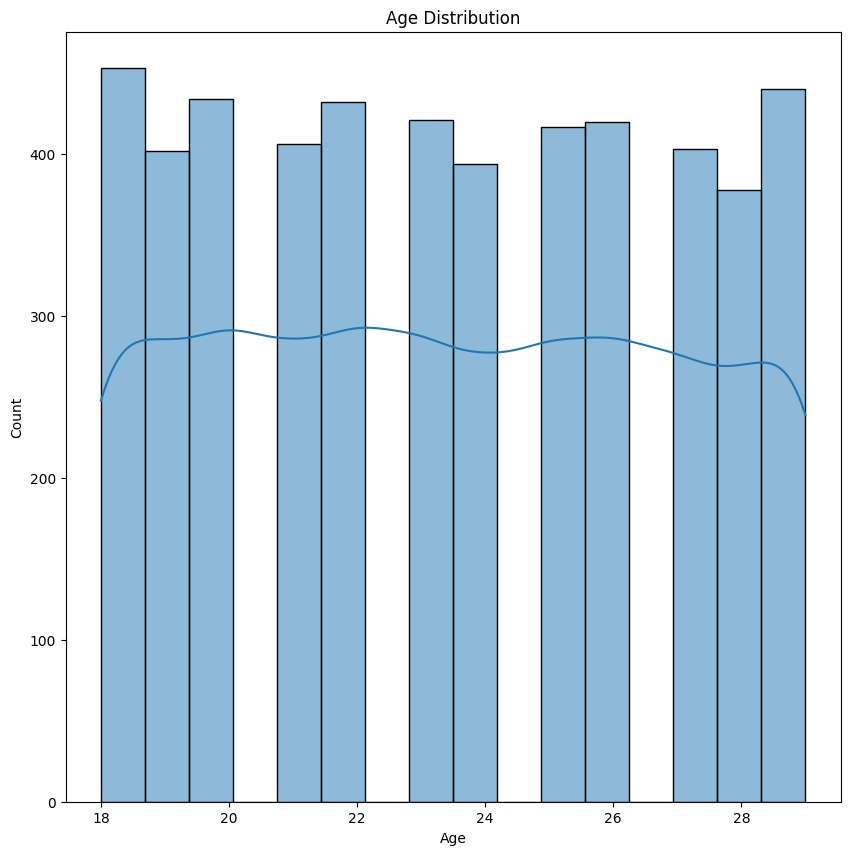

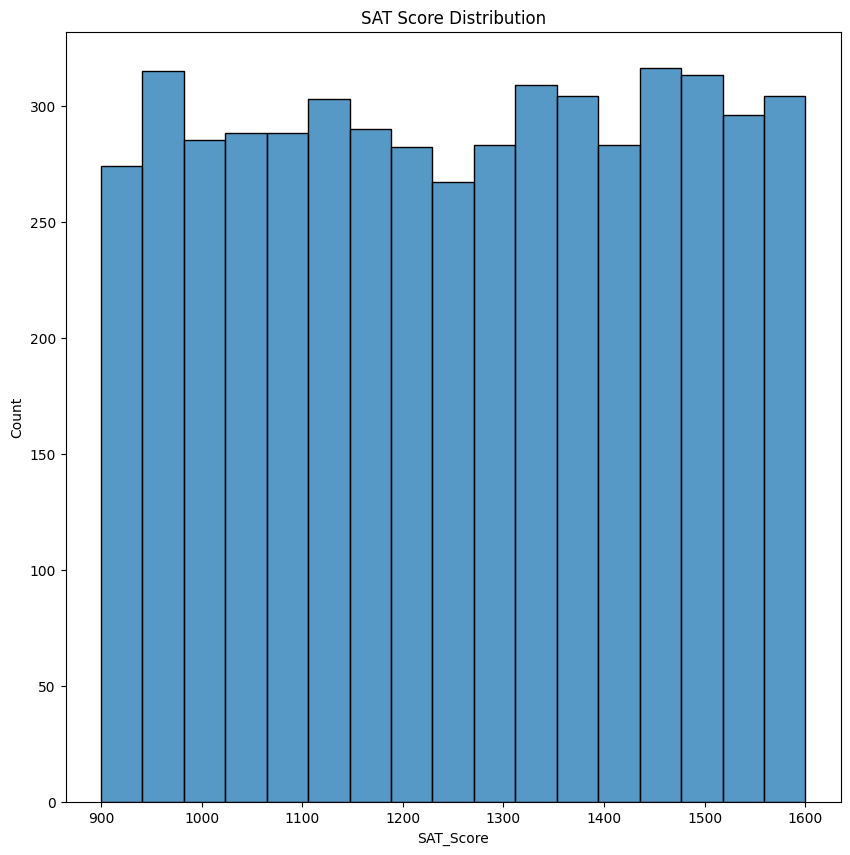

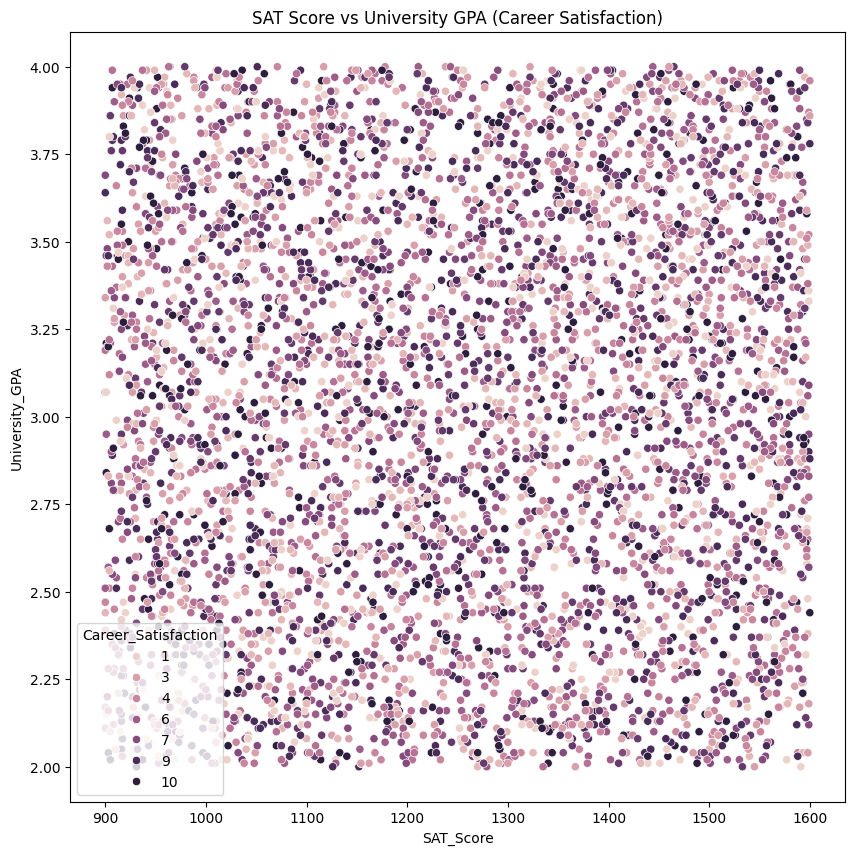

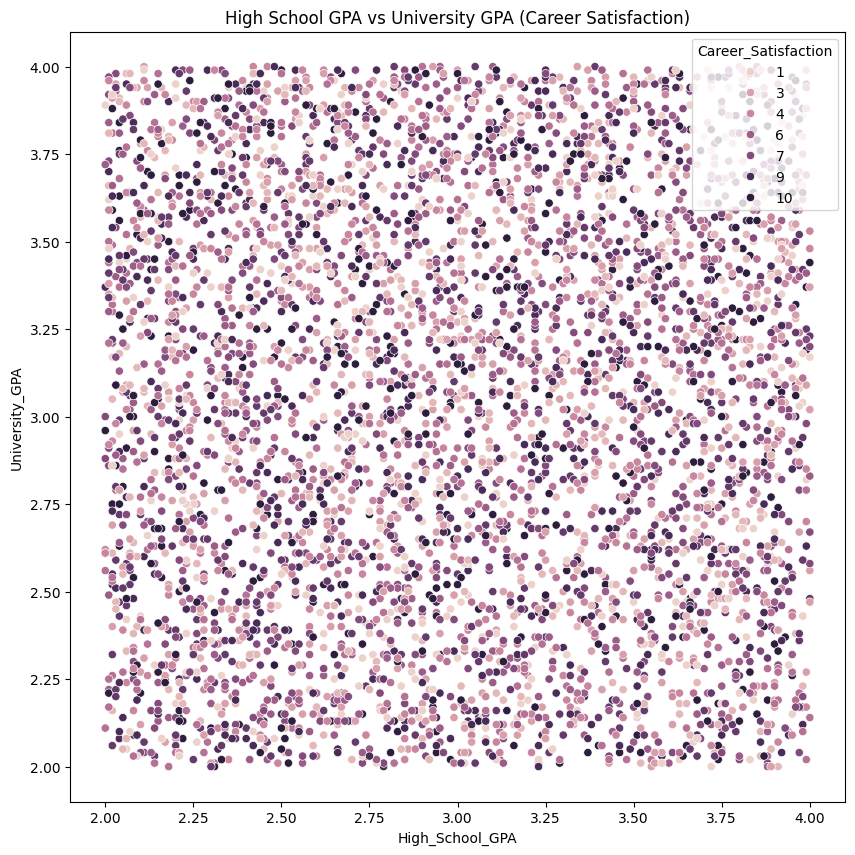

<Figure size 1000x1000 with 0 Axes>

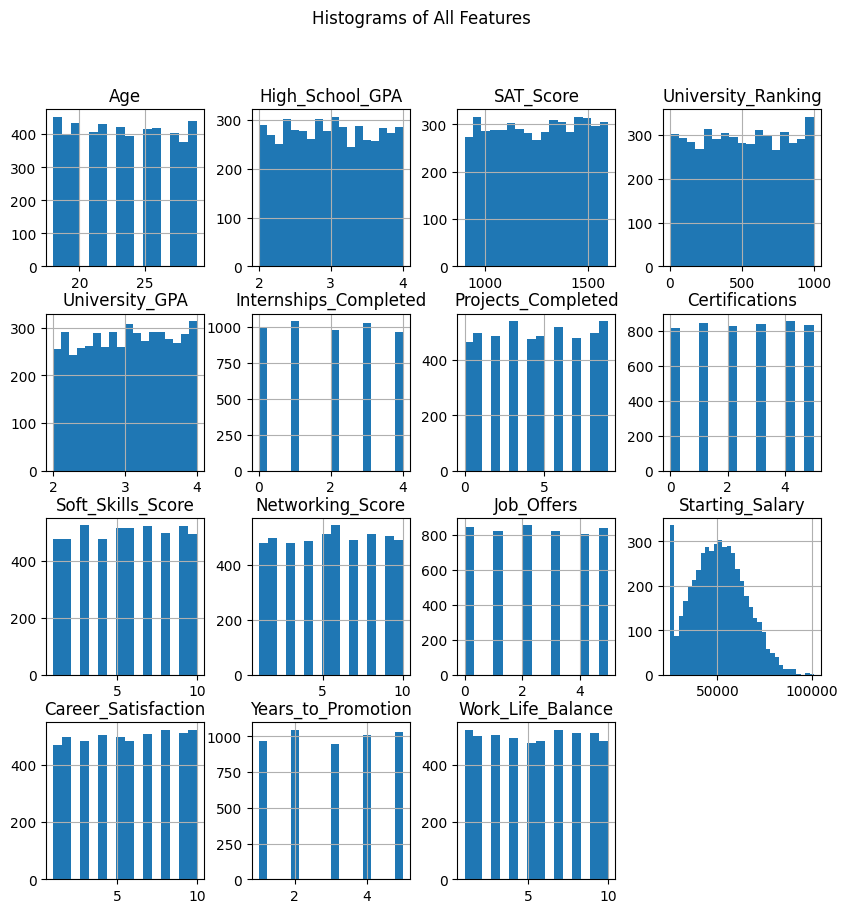

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization: Plot histograms and scatterplots
plt.figure(figsize=(10, 10))
sns.histplot(df["Age"], kde=True)
plt.title("Age Distribution")
plt.show()

plt.figure(figsize=(10, 10))
sns.histplot(df["SAT_Score"])
plt.title("SAT Score Distribution")
plt.show()

# Scatter plot between SAT Score and University GPA colored by Career Satisfaction
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x="SAT_Score", y="University_GPA", hue="Career_Satisfaction")
plt.title("SAT Score vs University GPA (Career Satisfaction)")
plt.show()

# Scatter plot between High School GPA and University GPA colored by Career Satisfaction
plt.figure(figsize=(10, 10))
sns.scatterplot(data=df, x="High_School_GPA", y="University_GPA", hue="Career_Satisfaction")
plt.title("High School GPA vs University GPA (Career Satisfaction)")
plt.show()

# Plot histogram for the entire dataframe
plt.figure(figsize=(10, 10))
df.hist(bins="auto", figsize=(10, 10))
plt.suptitle("Histograms of All Features")
plt.show()


**Z-Score**

In [ ]:
import pandas as pd
from scipy.stats import zscore

df = pd.read_csv(r"/content/drive/MyDrive/archive.csv")

# Calculate Z-scores for each numeric column
for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        z_scores = zscore(df[col])
        print(f"Z-scores for column '{col}':")
        print(z_scores)

# Function to remove outliers using IQR
def remove_outliers_iqr(df):
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:  # Only process numerical columns
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filter out outliers
            df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply the function to remove outliers
df_no_outliers_iqr = remove_outliers_iqr(df)

# Function to remove outliers using Z-score
def remove_outliers_zscore(df, threshold=1):
    for col in df.columns:
        if df[col].dtype in ['int64', 'float64']:  # Only process numerical columns
            z_scores = zscore(df[col])
            df = df[abs(z_scores) <= threshold]
    return df

# Apply the function to remove outliers
df_no_outliers_zscore = remove_outliers_zscore(df)

# Save cleaned data
df_no_outliers_iqr.to_csv(r"/content/drive/MyDrive/hi2_iqr.csv", index=False)
df_no_outliers_zscore.to_csv(r"/content/drive/MyDrive/hi2_zscore.csv", index=False)

Z-scores for column 'Age':
0       0.160594
1      -0.703122
2       1.312215
3       0.448499
4      -0.415217
          ...   
4995    0.736404
4996   -1.566838
4997   -1.278933
4998   -1.278933
4999   -0.127312
Name: Age, Length: 5000, dtype: float64
Z-scores for column 'High_School_GPA':
0       1.012867
1      -0.828640
2       0.734903
3      -0.984994
4      -1.593038
          ...   
4995   -0.967621
4996    1.638284
4997    0.787022
4998   -0.515931
4999   -1.401939
Name: High_School_GPA, Length: 5000, dtype: float64
Z-scores for column 'SAT_Score':
0      -0.993226
1      -0.210778
2      -0.299357
3       1.196642
4      -1.190068
          ...   
4995    0.020511
4996   -1.091647
4997    0.222274
4998   -1.062120
4999   -0.535568
Name: SAT_Score, Length: 5000, dtype: float64
Z-scores for column 'University_Ranking':
0      -0.733034
1      -1.348089
2       0.723856
3      -1.148798
4       0.325273
          ...   
4995    0.933456
4996    1.438557
4997    0.741036
4998   

**Experiment 7 and 8 - Filter Method: Pearsons Correlation Test**

Pearson's correlation test measures the strength and direction of a linear relationship between two continuous variables, producing a value between -1 (perfect negative correlation) and +1 (perfect positive correlation), with 0 meaning no correlation.


===== Pearson Correlation Test =====
Feature: Age, Correlation: 0.01317056716175415
Feature: High_School_GPA, Correlation: -0.009152127875674553
Feature: SAT_Score, Correlation: 0.0027758311702369325
Feature: University_Ranking, Correlation: 0.02136836348863229
Feature: University_GPA, Correlation: 0.0010224852506391013
Feature: Internships_Completed, Correlation: 0.018079734755293717
Feature: Projects_Completed, Correlation: 0.015192156544606634
Feature: Certifications, Correlation: -0.01836697657081677
Feature: Soft_Skills_Score, Correlation: 0.004870067745472408
Feature: Networking_Score, Correlation: 0.002621938633083455
Feature: Job_Offers, Correlation: -0.03401427454799919
Feature: Years_to_Promotion, Correlation: 0.005674118096864107
Feature: Work_Life_Balance, Correlation: 0.006370631587761249

===== Features Above Correlation Threshold =====

===== Correlation Matrix =====
                            Age  High_School_GPA  SAT_Score  \
Age                    1.000000         0

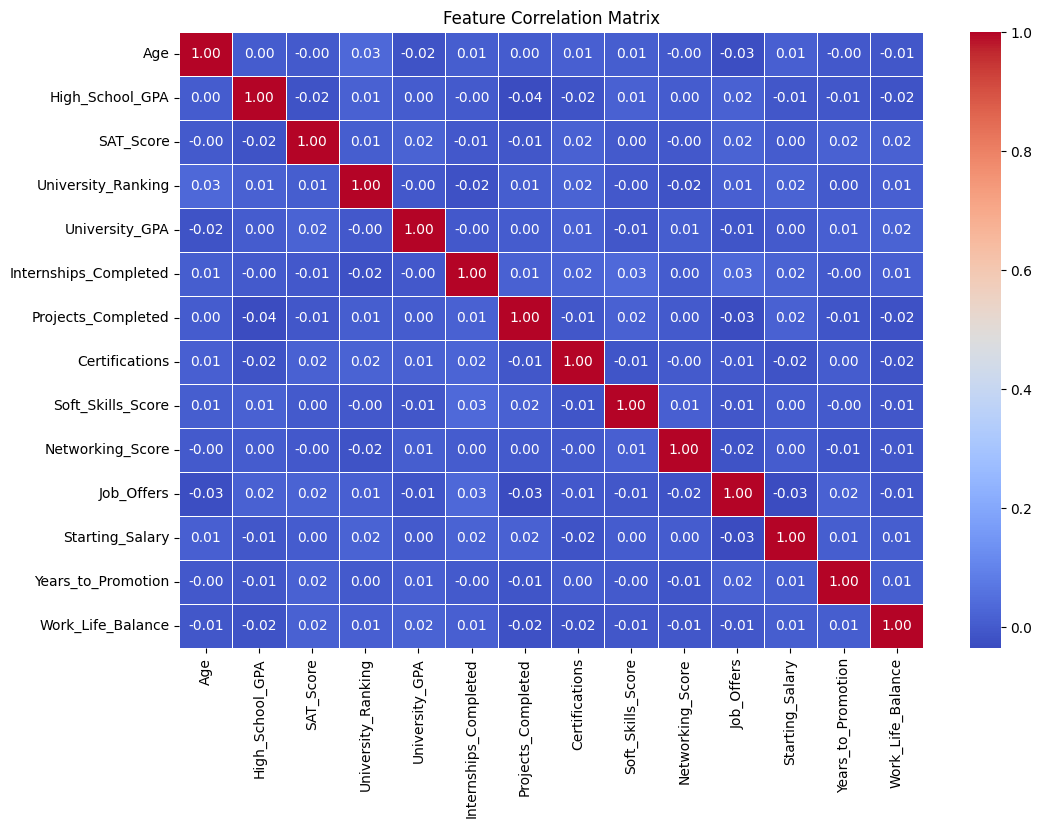

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Define numerical features and target column
target_column = 'Starting_Salary'  # Replace with actual numeric target
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Compute Pearson correlation for each feature with target
correlation_results = {}

print("\n===== Pearson Correlation Test =====")
for feature in numerical_features:
    if feature != target_column:
        corr, _ = pearsonr(df[feature], df[target_column])
        correlation_results[feature] = corr
        print(f"Feature: {feature}, Correlation: {corr}")

# Apply threshold-based filtering
threshold = 0.2  # Change this as needed (absolute correlation threshold)
filtered_features = {k: v for k, v in correlation_results.items() if abs(v) >= threshold}

# Display filtered features
print("\n===== Features Above Correlation Threshold =====")
for feature, corr in filtered_features.items():
    print(f"Feature: {feature}, Correlation: {corr}")

# Create correlation matrix
correlation_matrix = df[numerical_features].corr()

# Display correlation matrix
print("\n===== Correlation Matrix =====")
print(correlation_matrix)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


**Experiment 7 and 8 - Filter Method: ANOVA**

ANOVA (Analysis of Variance) is a statistical test that compares the means of two or more groups to determine if there’s a significant difference between them, helping to find relationships between categorical independent variables and a continuous dependent variable.

In [9]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import f_classif

# Define numerical features and target variable
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
target_column = 'Job_Offers'

# Ensure the target column is numeric (ANOVA requires numeric target categories)
df[target_column] = pd.to_numeric(df[target_column])

# Perform ANOVA F-Test
f_scores, p_values = f_classif(df[numerical_features], df[target_column])

# Display feature scores
print("\n===== ANOVA Feature Selection Results =====")
for feature, score, p_value in zip(numerical_features, f_scores, p_values):
    print(f"Feature: {feature}, Score: {score:.2f}, p-value: {p_value:.4f}")

# Optional: Filter features with a p-value less than 0.05 (statistically significant)
significant_features = [feature for feature, p in zip(numerical_features, p_values) if p < 0.05]

print("\nStatistically Significant Features (p < 0.05):")
print(significant_features)



===== ANOVA Feature Selection Results =====
Feature: Age, Score: 1.44, p-value: 0.2069
Feature: High_School_GPA, Score: 1.09, p-value: 0.3640
Feature: SAT_Score, Score: 1.07, p-value: 0.3721
Feature: University_Ranking, Score: 0.94, p-value: 0.4533
Feature: University_GPA, Score: 0.38, p-value: 0.8639
Feature: Internships_Completed, Score: 1.58, p-value: 0.1615
Feature: Projects_Completed, Score: 1.39, p-value: 0.2249
Feature: Certifications, Score: 1.20, p-value: 0.3057
Feature: Soft_Skills_Score, Score: 1.54, p-value: 0.1733
Feature: Networking_Score, Score: 1.34, p-value: 0.2435
Feature: Job_Offers, Score: inf, p-value: 0.0000
Feature: Starting_Salary, Score: 1.84, p-value: 0.1015
Feature: Career_Satisfaction, Score: 1.63, p-value: 0.1490
Feature: Years_to_Promotion, Score: 0.85, p-value: 0.5112
Feature: Work_Life_Balance, Score: 0.50, p-value: 0.7748

Statistically Significant Features (p < 0.05):
['Job_Offers']


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


**Experiment 7 and 8 - Filter Method: Chi-Square**

The Chi-Square test is a statistical test that measures the association between categorical variables by comparing the observed and expected frequencies in a contingency table to determine if they are independent.

In [10]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, chi2

# Define categorical features and target variable
categorical_features = ['Gender', 'Field_of_Study', 'Current_Job_Level', 'Entrepreneurship']
target_column = 'Job_Offers'  # Ensure this is a categorical variable

# Convert categorical features into numerical using one-hot encoding
df_encoded = pd.get_dummies(df[categorical_features])

# Perform Chi-Square test using SelectKBest
k = 5  # Number of top features to select
selector = SelectKBest(score_func=chi2, k='all')  # Initially select all
X_new = selector.fit_transform(df_encoded, df[target_column])

# Get feature scores
feature_scores = selector.scores_
threshold = np.percentile(feature_scores, 50)  # Select features above median score

# Get top-K features
top_k_selector = SelectKBest(score_func=chi2, k=k)
X_k_new = top_k_selector.fit_transform(df_encoded, df[target_column])
selected_k_features = np.array(df_encoded.columns)[top_k_selector.get_support()]
top_k_scores = top_k_selector.scores_[top_k_selector.get_support()]

# Display results for threshold-based selection
print("\n===== Chi-Square Features (Above Threshold) =====")
for feature, score in zip(df_encoded.columns, feature_scores):
    if score >= threshold:
        print(f"Feature: {feature}, Score: {score}")

# Display results for top-K selection
print("\n===== Top-K Chi-Square Features =====")
for feature, score in zip(selected_k_features, top_k_scores):
    print(f"Feature: {feature}, Score: {score}")



===== Chi-Square Features (Above Threshold) =====
Feature: Gender_Other, Score: 13.260404286393834
Feature: Field_of_Study_Business, Score: 2.2230357215979746
Feature: Field_of_Study_Engineering, Score: 2.165219804525695
Feature: Field_of_Study_Law, Score: 4.893303885081975
Feature: Field_of_Study_Mathematics, Score: 5.971140754159593
Feature: Field_of_Study_Medicine, Score: 4.735997447339847
Feature: Current_Job_Level_Senior, Score: 10.977924745217512
Feature: Entrepreneurship_Yes, Score: 2.270124102426917

===== Top-K Chi-Square Features =====
Feature: Gender_Other, Score: 13.260404286393834
Feature: Field_of_Study_Law, Score: 4.893303885081975
Feature: Field_of_Study_Mathematics, Score: 5.971140754159593
Feature: Field_of_Study_Medicine, Score: 4.735997447339847
Feature: Current_Job_Level_Senior, Score: 10.977924745217512


**Experiment 7 and 8 - Filter Method: Information Gain**

Information Gain measures how much a feature reduces uncertainty (entropy) about the target variable. It helps determine which features contribute the most to predicting the outcome by comparing the entropy before and after splitting the data based on that feature — the higher the gain, the more important the feature.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_classif, SelectKBest

# Define target variable
target_column = 'Career_Satisfaction'  # Replace with actual categorical target

# Encode categorical target
df[target_column] = df[target_column].astype('category').cat.codes

# Select numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Compute mutual information (information gain)
mi_scores = mutual_info_classif(df[numerical_features], df[target_column])

# Apply threshold-based filtering
threshold = np.percentile(mi_scores, 50)  # Select features above the 50th percentile

# Get top-K features
k = 5  # Number of top features to select
top_k_selector = SelectKBest(score_func=mutual_info_classif, k=k)
X_k_new = top_k_selector.fit_transform(df[numerical_features], df[target_column])
selected_k_features = np.array(numerical_features)[top_k_selector.get_support()]
top_k_scores = top_k_selector.scores_[top_k_selector.get_support()]

# Display results for threshold-based selection
print("\n===== Information Gain (Above Threshold) =====")
for feature, score in zip(numerical_features, mi_scores):
    if score >= threshold:
        print(f"Feature: {feature}, Information Gain: {score}")

# Display results for top-K selection
print("\n===== Top-K Information Gain Features =====")
for feature, score in zip(selected_k_features, top_k_scores):
    print(f"Feature: {feature}, Information Gain: {score}")



===== Information Gain (Above Threshold) =====
Feature: Age, Information Gain: 0.013558245441923855
Feature: High_School_GPA, Information Gain: 0.0
Feature: SAT_Score, Information Gain: 0.0
Feature: University_Ranking, Information Gain: 0.0
Feature: University_GPA, Information Gain: 0.0
Feature: Internships_Completed, Information Gain: 0.0
Feature: Projects_Completed, Information Gain: 0.0
Feature: Certifications, Information Gain: 0.013412648690828366
Feature: Soft_Skills_Score, Information Gain: 0.008856078294145586
Feature: Networking_Score, Information Gain: 0.01646235754308245
Feature: Job_Offers, Information Gain: 0.006098395062942519
Feature: Starting_Salary, Information Gain: 0.0
Feature: Years_to_Promotion, Information Gain: 0.0
Feature: Work_Life_Balance, Information Gain: 0.0

===== Top-K Information Gain Features =====
Feature: Age, Information Gain: 0.001432019701989251
Feature: University_GPA, Information Gain: 0.003615450679213872
Feature: Starting_Salary, Information G

**Experiment 9 and 10 - Wrapper Method: Forward Selection**

Forward Selection is a step-by-step feature selection technique that starts with no features and adds one feature at a time — the one that improves the model performance the most — until adding more features no longer improves the model significantly.

In [30]:
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder

# Load data
df = pd.read_csv('/content/drive/MyDrive/archive.csv')

# Define features and target
X = df.drop('Job_Offers', axis=1)
y = df['Job_Offers']

# Encode categorical columns
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# Forward Selection
selected_features = []
remaining_features = list(X.columns)

for _ in range(len(remaining_features)):
    best_score = float('-inf')
    best_feature = None

    for feature in remaining_features:
        trial_features = selected_features + [feature]
        X_trial = sm.add_constant(X[trial_features])
        model = sm.OLS(y, X_trial).fit()

        if model.rsquared > best_score:
            best_score = model.rsquared
            best_feature = feature

    if best_feature is not None:
        selected_features.append(best_feature)
        remaining_features.remove(best_feature)

print("Selected Features (Forward Selection):", selected_features)


Selected Features (Forward Selection): ['Starting_Salary', 'Internships_Completed', 'Projects_Completed', 'Age', 'SAT_Score', 'Networking_Score', 'Years_to_Promotion', 'High_School_GPA', 'University_GPA', 'Gender', 'University_Ranking', 'Entrepreneurship', 'Work_Life_Balance', 'Current_Job_Level', 'Student_ID', 'Soft_Skills_Score', 'Certifications', 'Field_of_Study', 'Career_Satisfaction']


**Experiment 9 and 10 - Wrapper Method: Backward Elimination**

Backward Elimination is a feature selection technique that starts with all features and removes the least significant one at each step — based on a statistical measure (like p-values in regression) — until only the most important features remain.

In [31]:
import statsmodels.api as sm

# Start with all features
features = list(X.columns)
X_with_const = sm.add_constant(X[features])

while len(features) > 0:
    model = sm.OLS(y, X_with_const).fit()
    p_values = model.pvalues[1:]

    worst_p = p_values.idxmax()
    if p_values[worst_p] > 0.05:
        features.remove(worst_p)
        X_with_const = sm.add_constant(X[features])
    else:
        break

print("Selected Features (Backward Elimination):", features)


Selected Features (Backward Elimination): ['Age', 'Internships_Completed', 'Projects_Completed', 'Starting_Salary']


**Experiment 9 and 10 - Wrapper Method: Recursive Feature Elimination (RFE)**

Recursive Feature Elimination (RFE) is a feature selection technique that recursively removes the least important features based on a model (like a classifier or regressor) until the desired number of features is reached, improving model performance.

In [32]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
rfe = RFE(model, n_features_to_select=5)
fit = rfe.fit(X, y)

selected_features = X.columns[fit.support_].tolist()
print("Selected Features (RFE):", selected_features)


Selected Features (RFE): ['Student_ID', 'High_School_GPA', 'SAT_Score', 'University_Ranking', 'Starting_Salary']


**Experiment 9 and 10 - Wrapper Method: Cross Validation (CV)**

Cross-validation (CV) is a technique to evaluate a model’s performance by splitting the data into multiple parts — training on some parts and testing on the remaining — to ensure the model generalizes well to unseen data.

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

print("Cross-Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())


Cross-Validation Scores: [-0.01973831 -0.03178143 -0.02556963 -0.00605948 -0.02227695]
Average CV Score: -0.02108515895905838
